In [23]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [24]:
## Creating Tensors
x = torch.tensor(1.,requires_grad = True)
w = torch.tensor(2.,requires_grad = True)
b = torch.tensor(3.,requires_grad = True)

In [25]:
print(x,w,b)

tensor(1., requires_grad=True) tensor(2., requires_grad=True) tensor(3., requires_grad=True)


In [26]:
y = w*x + b

In [27]:
y.backward()

In [ ]:
print(w.grad)
print(x.grad)
print(b.grad)

In [2]:
#####################################################################
############## Defining a fully Connected Network ###################
#####################################################################

In [12]:
# Creating a tensor of shape (10,3) and (10,2)
x = torch.randn(10,3)
y = torch.randn(10,2)

In [13]:
# Build a fully connected layer
linear = nn.Linear(3,2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.5704, -0.0642, -0.2522],
        [ 0.1124, -0.1073,  0.1275]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.0076, -0.1206], requires_grad=True)


In [14]:
# Build a loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.001)

In [15]:
# Forward Pass
pred = linear(x)
loss = criterion(pred,y)
print("loss:", loss.item())

loss: 1.08211088180542


In [16]:
# Backward Pass
loss.backward()

In [17]:
print("dL/dw:",linear.weight.grad)
print("dL/db:", linear.bias.grad)

dL/dw: tensor([[ 0.7249, -0.4809,  0.0607],
        [ 0.2747, -0.0633,  0.0800]])
dL/db: tensor([-0.7202, -0.3034])


In [18]:
print("values of w before updation \n", linear.weight)
optimizer.step()
print("values pf w after updation \n", linear.weight)

values of w before updation 
 Parameter containing:
tensor([[ 0.5704, -0.0642, -0.2522],
        [ 0.1124, -0.1073,  0.1275]], requires_grad=True)
values pf w after updation 
 Parameter containing:
tensor([[ 0.5697, -0.0638, -0.2523],
        [ 0.1122, -0.1073,  0.1274]], requires_grad=True)


In [19]:
train_loss = []
for i in range(100):
    pred = linear(x)
    loss = criterion(pred,y)
    loss.backward()
    optimizer.step()
    train_loss.append(loss)
    print("The value of LOSS after iteration", i, "is", loss, "\n")
    

The value of LOSS after iteration 0 is tensor(1.0807, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 1 is tensor(1.0778, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 2 is tensor(1.0734, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 3 is tensor(1.0677, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 4 is tensor(1.0606, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 5 is tensor(1.0521, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 6 is tensor(1.0424, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 7 is tensor(1.0315, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 8 is tensor(1.0195, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 9 is tensor(1.0063, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 10 is tensor(0.9922, grad_fn=<MseLossBackward>) 

The value of LOSS after iteration 11 is tensor(0.9771, grad_fn=<MseLossBackward>) 

Th

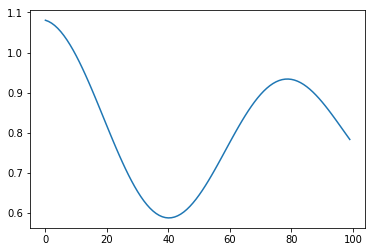

In [28]:
plt.plot(train_loss)

In [ ]:
######################################################################
#####################  Input Pipeline  ###############################
######################################################################

In [31]:
###### Downloading and Constructing the Cifar 10 dataset
train_dataset = torchvision.datasets.CIFAR10(root = 'data/', train = True, transform = transforms.ToTensor(), download = True )

In [35]:
# Data Loader ( this provides queues and threads in a very simple way)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)


In [37]:
# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

In [38]:
# Actual usage of data_loader will be as follows
for images,labels in train_loader:
    ## Training should be writter here
    pass

In [41]:
(data_iter.next()[0]).size()

torch.Size([64, 3, 32, 32])

In [42]:
######################################################################
################# Downloading Pretrained Models ######################
#################################################################
#####

In [43]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained = True)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/prerit/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:50<00:00, 924245.17it/s] 


In [48]:
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace the top layer for fine tuning
resnet.fc = nn.Linear(resnet.fc.in_features, 100)
print(resnet.fc)

Linear(in_features=512, out_features=100, bias=True)
